# Importing the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
a="Downloads/az20.txt"
df=pd.read_csv("Downloads/az20.txt",delimiter = '\t', index_col=False) 
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups') 
df=df.loc[df['Substrate'].str.contains('(None)|(M\d+)')==False] # removing any with none or M for residue
print df

In [87]:
#joined the tsv columns and got rid of additional empty columns produced 
df1=pd.DataFrame(data=df['Substrate'])
df2=pd.DataFrame(data=df['control_mean'])
df3=pd.DataFrame(data=df['AZ20_mean'])
df4=pd.DataFrame(data=df['AZ20_fold_change'])
df5=pd.DataFrame(data=df['AZ20_p-value'])
df6=pd.DataFrame(data=df['AZ20_ctrlCV'])
df7=pd.DataFrame(data=df['AZ20_treatCV'])
table=pd.concat([df1,df2, df3,df4,df5], axis=1, join_axes=[df2.index])
                # df6,df7], axis=1, join_axes=[df2.index])
table


       AZ20_mean
0       1.730074
1       1.730074
7       1.035433
9       0.419319
10      0.370951
11      0.946750
12      6.699488
13      1.476630
14      0.831641
15      1.153553
16      6.699488
17      2.154285
19      0.984721
22      1.061039
23      0.000000
24      1.108601
25      1.108601
28      2.747845
29      0.968503
31      0.907891
33      0.307025
34      0.724889
35      1.635073
36      1.578449
37      0.752334
38      1.049577
39      1.255087
40      1.578449
42           inf
44      1.150663
...          ...
15489   1.289077
15490   2.062222
15491   0.945750
15492        NaN
15493   0.827378
15494   0.411198
15495        inf
15496   1.194617
15497        NaN
15498   0.860103
15500        NaN
15501   0.703390
15503   1.293757
15504   1.205466
15509   3.490117
15510   1.003941
15511   2.644917
15512   1.420448
15513   1.363948
15514   1.293595
15515   0.832521
15516   1.217670
15517   1.862118
15518   1.197728
15519   0.926602
15520   0.749624
15521        N

C:\Users\Bryan\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
C:\Users\Bryan\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


# Processing data removing 0 and extracting significant values

In [5]:
df4=df4.replace([np.inf, -np.inf], np.nan)# removing nan values from my fold change
df4a=df4.dropna(axis=0, how='any')
df4b=df4a[(df4a['AZ20_fold_change'] >0.0000000)]
sig=df5[(df5['AZ20_p-value'] < 0.05)] #extracting significant phosphosites
ccut=df6[(df6['AZ20_ctrlCV'] < 0.05)]
tcut=df7[(df7['AZ20_treatCV'] < 0.05)]
filtr=pd.concat([sig,tcut,ccut,df4b,df1],join='inner', axis=1)
filter_values=filtr
fcut = np.log2(df4b) #log2 of foldchange
#print fcut['AZ20_fold_change']

In [40]:
sig=df5[(df5['AZ20_p-value'] < 0.05)] #extracting significant phosphosites
sigp=pd.concat([sig,df1], axis=1, join_axes=[sig.index]) # substrate and p-values
dfd= sigp.Substrate.str.extract('(\w+\d+\d+)', expand = False) #extracted residue and position
dfw=sigp.Substrate.str.extract('(\w+)', expand = False) # phosphosite name
dfp = dfw.astype(str) + "("+dfd.astype(str)+")" #joined name,position and residue together
print sigp
match=list(dfp) # list of the phoshosites
match2d=pd.concat([dfp,fcut], axis=1, join_axes=[dfp.index])# made a table of the phosphosites and their fold change
match2d=match2d.replace([np.inf,-np.inf,np.nan]) # removed inf values
#for the matching
matchds=match2d.rename(index=str, columns={"Substrate": "Search_key"}) # renamed the substrate to search key for the matching


       AZ20_p-value      Substrate
13     5.811300e-04     AAK1(S637)
17     4.620755e-02     AAK1(T653)
35     2.059234e-02    ABCF1(S105)
36     2.474896e-02    ABCF1(S109)
40     2.474896e-02    ABCF1(T108)
53     7.845876e-03     ABL2(S620)
55     9.935100e-03     ABL2(S655)
56     3.906608e-02     ABL2(S936)
64     3.201311e-03      ABR(S632)
73     6.909829e-03     ACACA(S80)
83     1.386613e-02    ACIN1(S132)
84     2.160807e-02    ACIN1(S216)
85     4.037134e-03    ACIN1(S240)
86     4.037134e-03    ACIN1(S243)
87     3.873251e-02    ACIN1(S386)
88     2.815655e-02    ACIN1(S388)
96     4.538935e-02    ACIN1(S710)
100    3.412940e-04    ACIN1(S863)
104    1.009450e-04     ACLY(S455)
144    1.197370e-04    ACTG1(S239)
169    5.463380e-04  ADAMTSL3(S65)
170    5.463380e-04  ADAMTSL3(Y60)
187    7.356632e-03     ADD2(S613)
206    1.973980e-04     ADNP(S970)
207    2.690099e-02    ADRB2(S246)
213    1.143063e-02    AEBP1(S404)
227    7.709541e-03    AFDN(S1275)
229    2.059992e-03 

# Graphs

Boxplot

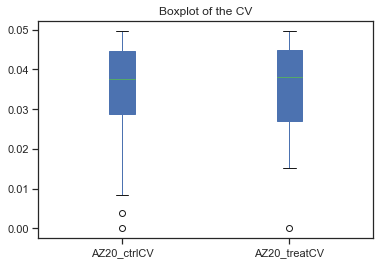

In [14]:
box=pd.concat([ccut,tcut], axis=1, join_axes=[ccut.index])
# Create the boxplot
box.plot.box(title="Boxplot of the CV",patch_artist=True)
plt.show()


Histogram

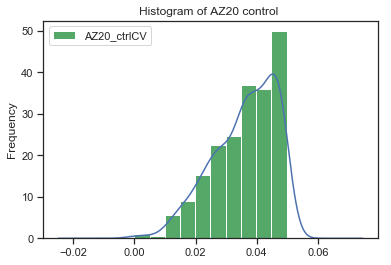

In [15]:
ccut=df6[(df6['AZ20_ctrlCV'] < 0.05)]
cvcut=pd.concat([ccut,df1], axis=1, join_axes=[ccut.index])
fig, ax = plt.subplots()

cvcut.plot.kde(ax=ax,legend=False)
cvcut.plot.hist(title="Histogram of AZ20 control ",ax=ax,density=True,color = "g")
plt.show()
df6.plot.hist(density=True, ax=ax)

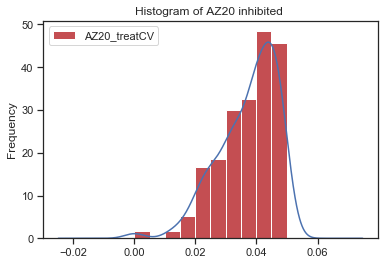

In [16]:
tcut=df7[(df7['AZ20_treatCV'] < 0.05)] # taking p values of less than 0.05
tvcut=pd.concat([tcut,df1], axis=1, join_axes=[tcut.index])
fig, ax = plt.subplots()
tvcut.plot.kde(ax=ax,legend=False)
tvcut.plot.hist(title="Histogram of AZ20 inhibited ",ax=ax,density=True,color = "r")
plt.show()


Barplot

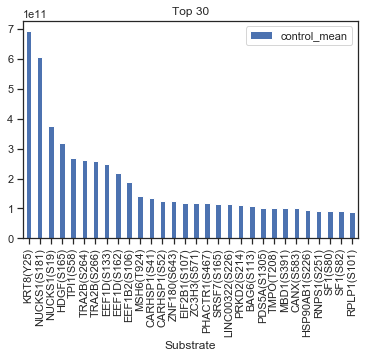

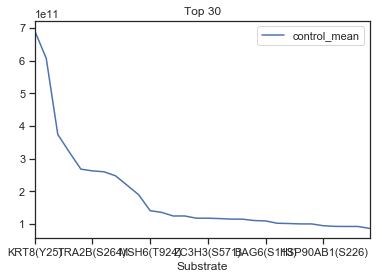

In [17]:
#Control Mean
cm=df2.nlargest(30, 'control_mean', keep='first')#selecting top 30 biggest value
cmean=pd.concat([cm,df1], axis=1, join_axes=[cm.index])
cmean.set_index('Substrate').plot.bar(title='Top 30', ) # added subtrate labels
cmean.set_index('Substrate').plot(title='Top 30', )
plt.show()

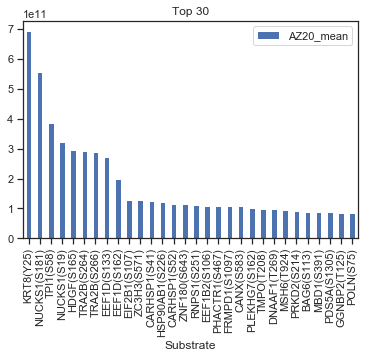

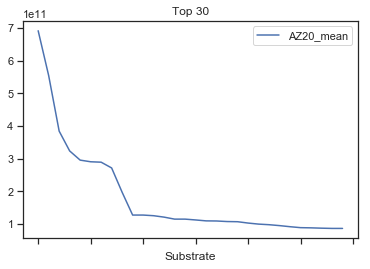

In [20]:
#inhibited mean
am=df3.nlargest(30, 'AZ20_mean', keep='first')
amean=pd.concat([am,df1], axis=1, join_axes=[am.index])
amean.set_index('Substrate').plot.bar(title='Top 30', ) # added subtrate labels
amean.set_index('Substrate').plot(title='Top 30', )
plt.show()

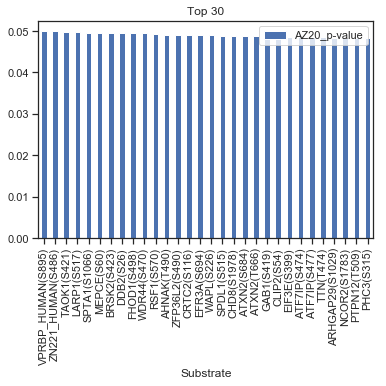

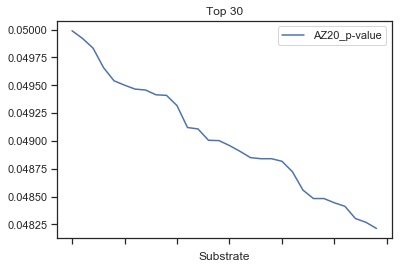

In [39]:
#Significant Phosphosite graphs
#Top 30
p30=sigp.nlargest(30, 'AZ20_p-value', keep='first')
p30.set_index('Substrate').plot.bar(title='Top 30', ) # added subtrate labels
p30.set_index('Substrate').plot(title='Top 30', )
plt.show()

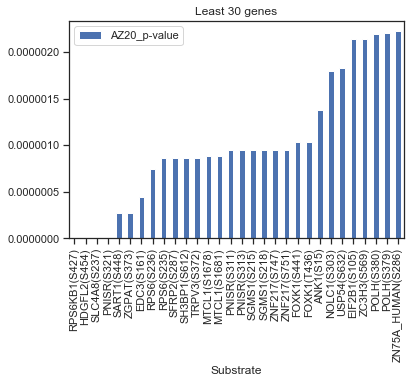

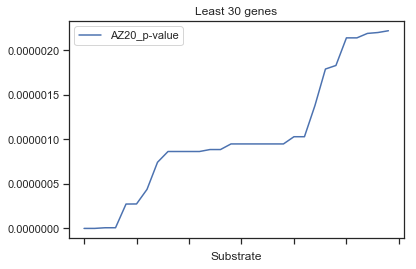

In [22]:
#Significant Phosphosite graphs
#Bottom 30
p_30=sigp.nsmallest(30, 'AZ20_p-value', keep='first')
p_30.set_index('Substrate').plot.bar(title='Least 30 genes', ) # added subtrate labels
p_30.set_index('Substrate').plot(title='Least 30 genes', )
plt.show()

# Volcano Plot

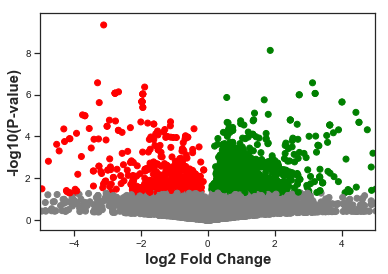

In [42]:
df['log2']=(np.log2(df4b))
df.loc[(df['log2'] >= 0) & (df5['AZ20_p-value'] < 0.05), 'color'] = "green"  # upregulated
df.loc[(df['log2'] <=- 0) & (df5['AZ20_p-value'] < 0.05), 'color'] = "red"   # downregulated
df['color'].fillna('grey', inplace=True)
df['logpv']=-(np.log10(df5['AZ20_p-value']))
plt.scatter(df['log2'], df['logpv'], c=df['color'])
plt.xlabel('log2 Fold Change',fontsize=15, fontname="sans-serif", fontweight="bold")
plt.ylabel('-log10(P-value)', fontsize=15, fontname="sans-serif", fontweight="bold")
plt.xlim(-5,5) # change middle to 1 #(-8000,8000)
plt.xticks(fontsize=10, fontname="sans-serif")
plt.yticks(fontsize=10, fontname="sans-serif")
plt.show()


In [37]:
#UPDATE TOP 10 UP AND DOWN
table=pd.concat([df1,df4,df5], axis=1, join_axes=[df4.index])
a=table.loc[(df['log2'] >= 0) & (df5['AZ20_p-value'] < 0.05)]  # upregulated
b=table.loc[(df['log2'] <=- 0) & (df5['AZ20_p-value'] < 0.05)]   # downregulated
log2tab=pd.DataFrame(data=df['log2'])
log2tab.columns = ['FC']
log2table=pd.concat([df1,log2tab], axis=1, join_axes=[log2tab.index])

a10=log2table.nlargest(10,"FC" , keep='first')
b10=log2table.nsmallest(10,"FC", keep='first')
print a10
print b10


           Substrate         FC
13384    TEKT1(S396)  13.066043
7941     NAV2(S1869)  12.645363
8284      NNMT(S261)  11.592302
8447      NTHL1(S53)  11.387347
3451    DUSP16(S627)  11.258878
12998    STK10(T185)  11.045368
6668     LRCH3(S324)   9.958719
7078    MARCKS(S163)   9.267404
13293  TBC1D9B(S399)   9.211167
7932       NAV1(T92)   9.182956
           Substrate        FC
3197    DIDO1(S1974) -9.661104
1970     CD2AP(T236) -8.944750
10560    RAPH1(S965) -8.612032
3570      EEF2K(S72) -8.515212
3573      EEF2K(Y69) -8.515212
3698   EIF4EBP2(S65) -8.097839
11749     SEPT9(S85) -7.141459
3301     DNMT1(S954) -7.096322
11287  RPS6KB1(S427) -6.981935
3691   EIF4EBP1(T68) -6.910824


# Relative Activity Calculation

In [46]:
dp=pd.read_csv("Downloads/Phosphosites_basedOn_PSPlusdata_28Jan.csv",delimiter = ',' , index_col=0)
dp.reset_index()
dic=dp.groupby('Kinase')['Substrate'].apply(list).to_dict()# doesn't have modiification number as well
dp

,Key,Kinase,Modification_Site,Neighbour_Seq,Search_key,Substrate,Substrate_Gene,Substrate_Num,Uniprot_link
0,E2AK1_HUMAN(S52)eIF2-alpha,E2AK1_HUMAN,S52,MILLsELsRRRIRsI,EIF2S1(S52),eIF2-alpha,EIF2S1,P05198,www.uniprot.org/uniprot/P05198/protvista
1,E2AK1_HUMAN(S49)eIF2-alpha,E2AK1_HUMAN,S49,IEGMILLsELsRRRI,EIF2S1(S49),eIF2-alpha,EIF2S1,P05198,www.uniprot.org/uniprot/P05198/protvista
2,KPCD_HUMAN(S259)HDAC5,KPCD_HUMAN,S259,FPLRkTAsEPNLKVR,HDAC5(S259),HDAC5,HDAC5,Q9UQL6,www.uniprot.org/uniprot/Q9UQL6/protvista
3,KPCD_HUMAN(S204)PTPRA iso2,KPCD_HUMAN,S204,PLLARSPsTNRKYPP,PTPRA(S204),PTPRA iso2,PTPRA,P18433-2,www.uniprot.org/uniprot/P18433-2/protvista
4,KPCD_HUMAN(S302)hnRNP K,KPCD_HUMAN,S302,GrGGrGGsrArNLPL,HNRNPK(S302),hnRNP K,HNRNPK,P61978,www.uniprot.org/uniprot/P61978/protvista
5,KPCD_HUMAN(T71)SHOC2,KPCD_HUMAN,T71,VAFSVDNtIKRPNPA,SHOC2(T71),SHOC2,SHOC2,Q9UQ13,www.uniprot.org/uniprot/Q9UQ13/protvista
6,KPCD_HUMAN(S237)BVR,KPCD_HUMAN,S237,sFHFksGsLENVPNV,BLVRA(S237),BVR,BLVRA,P53004,www.uniprot.org/uniprot/P53004/protvista
7,KPCD_HUMAN(T1224)MUC1,KPCD_HUMAN,T1224,RyVPPsstDRsPyEK,MUC1(T1224),MUC1,MUC1,P15941,www.uniprot.org/uniprot/P15941/protvista
8,KPCD_HUMAN(S726)ADD1,KPCD_HUMAN,S726,KKKFRtPsFLKKsKK,ADD1(S726),ADD1,ADD1,P35611,www.uniprot.org/uniprot/P35611/protvista
9,KPCD_HUMAN(S370)p47phox,KPCD_HUMAN,S370,PAVPPRPsADLILNR,NCF1(S370),p47phox,NCF1,P14598,www.uniprot.org/uniprot/P14598/protvista


In [47]:
#Producing lists for matches
phos={}
listformatch=[]
kinase=list(dp.Kinase)
match=list(dfp) # list of significant (p-value) phosphosites
site=list(dp.Modification_Site)
substrate=list(dp.Substrate_Gene)

# made a dictionary of the kinases and phosphosites match from the phosphosite plus database
for i in range(0,len(kinase)):
    if kinase[i] not in phos.keys():
        phos[kinase[i]]=[substrate[i]+'('+site[i]+')']
    else:
        phos[kinase[i]].append(str(substrate[i])+'('+str(site[i])+')')

#print phos
# made a list of phoshosites from the phosphosite plus database to use for matching
for x in phos.values():
    x=list(x)
    #print x
    listformatch.extend(x)
#print listformatch

#list of the matches
matchexist=[]
for y in match:
    if y in listformatch:
        #print y
        #print y
        matchexist.append(y)
    
    else:
        pass


print matchexist
#print phos


['ABCF1(S109)', 'ACACA(S80)', 'ADD2(S613)', 'AKIRIN2(S18)', 'AKT1S1(S183)', 'ANAPC1(S355)', 'ANAPC1(S377)', 'ARHGEF6(S225)', 'ARHGEF7(S518)', 'ATF2(T71)', 'BAD(S118)', 'BLVRA(S230)', 'BRCA1(S1189)', 'BRCA1(S1191)', 'BRCA1(S1497)', 'CAD(S1859)', 'CARHSP1(S52)', 'CBX5(S92)', 'CCDC6(S240)', 'CCT2(S260)', 'CD4(S440)', 'CDCA5(S83)', 'CDCA8(S219)', 'CELF1(S28)', 'CGN(S131)', 'CRMP1(S522)', 'CRMP1(T509)', 'CTNND1(S879)', 'CUEDC2(S110)', 'DDX3Y(S592)', 'DLGAP5(S725)', 'DNMT1(S127)', 'DNMT1(S714)', 'DPYSL2(T509)', 'EDC3(S161)', 'EEF2K(S72)', 'EEF2K(S74)', 'EIF4A3(T163)', 'EIF4B(S406)', 'EIF4EBP1(S65)', 'EIF4EBP1(T46)', 'EIF4EBP1(T70)', 'EIF4G1(S1231)', 'ELAVL1(S202)', 'EPRS(S886)', 'EZH2(T367)', 'EZR(T567)', 'FAF1(S582)', 'GAPVD1(S950)', 'GBF1(T1337)', 'GINS2(S182)', 'GORASP2(T222)', 'GSK3B(Y216)', 'GTF2F1(S385)', 'GTF2F1(T389)', 'GTF2I(S784)', 'HNRNPA1(S199)', 'HNRNPU(S59)', 'HSPB1(S15)', 'HSPB1(S82)', 'HSPB8(S57)', 'HTT(S1179)', 'HTT(S1199)', 'KAT5(S90)', 'KLF3(S101)', 'KLF3(S92)', 'LARP1(S76

In [48]:
#Matched the kinase to the phosphosites in our dataset using isin
#drop all column except search key and kinase
z=dp.drop(['Key', 'Substrate','Substrate_Gene','Substrate_Num','Uniprot_link','Modification_Site','Neighbour_Seq'], axis=1)
#print z

wsz=z[z["Search_key"].isin(matchexist)] # isin function to check if search key is in our matchexist

kinw=wsz["Kinase"]

seark=wsz["Search_key"]

sear=list(seark)




In [49]:
#checking no of match
defmatch=[]
for mx in matchexist:
    if mx in sear:
        defmatch.append(mx)

print len(defmatch) 
#"The Number of matches" + " " + "=" 
print defmatch
        

130
['ABCF1(S109)', 'ACACA(S80)', 'ADD2(S613)', 'AKIRIN2(S18)', 'AKT1S1(S183)', 'ANAPC1(S355)', 'ANAPC1(S377)', 'ARHGEF6(S225)', 'ARHGEF7(S518)', 'ATF2(T71)', 'BAD(S118)', 'BLVRA(S230)', 'BRCA1(S1189)', 'BRCA1(S1191)', 'BRCA1(S1497)', 'CAD(S1859)', 'CARHSP1(S52)', 'CBX5(S92)', 'CCDC6(S240)', 'CCT2(S260)', 'CD4(S440)', 'CDCA5(S83)', 'CDCA8(S219)', 'CELF1(S28)', 'CGN(S131)', 'CRMP1(S522)', 'CRMP1(T509)', 'CTNND1(S879)', 'CUEDC2(S110)', 'DDX3Y(S592)', 'DLGAP5(S725)', 'DNMT1(S127)', 'DNMT1(S714)', 'DPYSL2(T509)', 'EDC3(S161)', 'EEF2K(S72)', 'EEF2K(S74)', 'EIF4A3(T163)', 'EIF4B(S406)', 'EIF4EBP1(S65)', 'EIF4EBP1(T46)', 'EIF4EBP1(T70)', 'EIF4G1(S1231)', 'ELAVL1(S202)', 'EPRS(S886)', 'EZH2(T367)', 'EZR(T567)', 'FAF1(S582)', 'GAPVD1(S950)', 'GBF1(T1337)', 'GINS2(S182)', 'GORASP2(T222)', 'GSK3B(Y216)', 'GTF2F1(S385)', 'GTF2F1(T389)', 'GTF2I(S784)', 'HNRNPA1(S199)', 'HNRNPU(S59)', 'HSPB1(S15)', 'HSPB1(S82)', 'HSPB8(S57)', 'HTT(S1179)', 'HTT(S1199)', 'KAT5(S90)', 'KLF3(S101)', 'KLF3(S92)', 'LARP1

In [60]:
mfv=match2d[match2d["Substrate"].isin(seark)] #used isin to get fold change for matched kinases
kinkey=wsz["Search_key"]
kinsearch=wsz["Kinase"]

matcht=pd.concat([kinkey,kinsearch],axis=1,join_axes=[kinsearch.index]) # table of search key and kinase

match2d=match2d.replace([np.inf,-np.inf,np.nan]) #Removing zero and inf values
matchds=match2d.rename(index=str, columns={"Substrate": "Search_key"})

sff= pd.merge(matcht, matchds) # Kinase+Substrate and fold change 

#made dict for kinase and the fold change
kinase
kinasedict={}
kinases=list(sff["Kinase"])
foldch=list(sff["AZ20_fold_change"])
kinasecount={}
#print kinaseff
count=0
for i in range(0,len(sff)):
    if kinases[i] not in kinasedict.keys():
        kinasedict[kinases[i]]=[foldch[i]]
        
    else:
        kinasedict[kinases[i]].append(foldch[i])
       

#print kinasedict # dic of kinase and fold change

#number of matches per kinase
for key,value in kinasedict.items():
    if key in kinasedict:
         # print len(value)
          kinasecount[key]=(len(value))
    else:
        pass
    
#print kinasecount    
print kinasecount

    

{'KPCD_HUMAN': 3, 'STK26_HUMAN': 1, 'MK14_HUMAN': 2, 'UHMK1_HUMAN': 1, 'MK03_HUMAN': 9, 'GSK3B_HUMAN': 10, 'ARBK1_HUMAN': 1, 'KPCB_HUMAN': 1, 'KPCI_HUMAN': 2, 'NEK9_HUMAN': 1, 'SRC_HUMAN': 1, 'AKT1_HUMAN': 10, 'AAPK2_HUMAN': 1, 'CHK1_HUMAN': 4, 'KS6B1_HUMAN': 4, 'KGP1_HUMAN': 1, 'MK09_HUMAN': 1, 'RET_HUMAN': 2, 'STK10_HUMAN': 1, 'PLK1_HUMAN': 4, 'ARAF_HUMAN': 2, 'LRRK2_HUMAN': 1, 'KS6A1_HUMAN': 6, 'PAK1_HUMAN': 2, 'KS6A3_HUMAN': 3, 'MK08_HUMAN': 1, 'MP2K1_HUMAN': 4, 'AAPK1_HUMAN': 4, 'RAF1_HUMAN': 1, 'BRAF_HUMAN': 2, 'ATR_HUMAN': 2, 'MAPK2_HUMAN': 2, 'KPCE_HUMAN': 1, 'M4K4_HUMAN': 1, 'MP2K2_HUMAN': 1, 'JAK2_HUMAN': 2, 'AURKA_HUMAN': 3, 'INSR_HUMAN': 1, 'DYRK2_HUMAN': 2, 'KPCD1_HUMAN': 2, 'KPCA_HUMAN': 6, 'ROCK1_HUMAN': 1, 'KS6B2_HUMAN': 1, 'MK13_HUMAN': 1, 'PLK3_HUMAN': 1, 'CDK6_HUMAN': 1, 'PRKDC_HUMAN': 3, 'KAPCA_HUMAN': 7, 'GSK3A_HUMAN': 2, 'CDK1_HUMAN': 26, 'PAK4_HUMAN': 1, 'PDPK1_HUMAN': 1, 'CDK2_HUMAN': 19, 'MTOR_HUMAN': 10, 'AURKB_HUMAN': 9, 'HIPK2_HUMAN': 3, 'No such kinase': 5,

In [61]:
#Removed zero and inf valuess
df4=df4.replace([np.inf, -np.inf], np.nan)# removing nan values from my fold change
df4a=df4.dropna(axis=0, how='any')
df4b=df4a[(df4a['AZ20_fold_change'] >0.000000)]
log2r=np.log2(df4b)

matchlog=pd.concat([dfp,log2r], axis=1, join_axes=[dfp.index]) # table of the log fold change and the substrate
matcht=pd.concat([kinkey,kinsearch],axis=1,join_axes=[kinsearch.index])

sff= pd.merge(matcht, matchds)# Kinase+substrate+foldchange

match2d=match2d[~match2d.isin([np.nan, np.inf, -np.inf]).any(1)]
matchds=match2d.rename(index=str, columns={"Substrate": "Search_key"})
 

kinase
kinaselogdict={}
logkinases=list(sff["Kinase"])
logfoldch=list(sff["AZ20_fold_change"])
count=0
for i in range(0,len(sff)):
    if logkinases[i] not in kinaselogdict.keys():
        kinaselogdict[kinases[i]]=[logfoldch[i]]
        
    else:
        kinaselogdict[logkinases[i]].append(logfoldch[i])
        
print kinaselogdict # dic of kinase and fold change





{'KPCD_HUMAN': [-2.767835556728845, 1.1605820198040362, -2.6640066292721247], 'STK26_HUMAN': [-1.8705473492389508], 'MK14_HUMAN': [1.2319609309410757, -2.3905986189611195], 'UHMK1_HUMAN': [0.35174868849111096], 'MK03_HUMAN': [1.1605820198040362, -1.9977600629033834, 1.2319609309410757, 1.0599046065351994, -0.9096125607913198, 1.0085506851101669, 1.316614906906406, 0.35174868849111096, -0.6920495059981514], 'KPCB_HUMAN': [0.35174868849111096], 'PDPK1_HUMAN': [0.5398893314922536], 'LMTK2_HUMAN': [0.5035530053056071], 'PAK4_HUMAN': [1.060473537814611], 'M4K4_HUMAN': [-1.8705473492389508], 'NEK9_HUMAN': [-3.0372525499175156], 'MELK_HUMAN': [-0.31906894934820756], 'INSR_HUMAN': [-2.586157526818021], 'AKT1_HUMAN': [-2.9056010492809605, 0.49037202198038343, 0.5035530053056071, -0.11966015336377424, 1.0208824303746504, -3.41346599487291, -0.66323820808457, -1.8839331879359271, -0.6529381571339258, -1.0928084965137668], 'ARAF_HUMAN': [-0.5372450278740717, 0.703793678105434], 'CHK1_HUMAN': [3.35

In [62]:
#mean and sd of the entire dataset
FCmean=np.ma.masked_invalid(log2r).sum()/len(log2r) 
sd=np.ma.masked_invalid(log2r).std()

print sd
print FCmean

1.3161426629777306
0.17821629066327854


In [63]:
#made a dict of the average fold change for each kinase
avgDict = {}

for k,v in kinasedict.items():
    avgDict[k] = sum(v)/ float(len(v))
    
print avgDict

{'KPCD_HUMAN': -1.423753388732311, 'STK26_HUMAN': -1.8705473492389508, 'MK14_HUMAN': -0.5793188440100219, 'UHMK1_HUMAN': 0.35174868849111096, 'MK03_HUMAN': 0.2811044120105712, 'GSK3B_HUMAN': -0.26559340895092637, 'ARBK1_HUMAN': -1.8705473492389508, 'KPCB_HUMAN': 0.35174868849111096, 'KPCI_HUMAN': -1.2038961885565111, 'NEK9_HUMAN': -3.0372525499175156, 'SRC_HUMAN': -2.586157526818021, 'AKT1_HUMAN': -0.8716837789525194, 'AAPK2_HUMAN': 0.9574821189356051, 'CHK1_HUMAN': 0.8441487811325384, 'KS6B1_HUMAN': -1.215032776354024, 'KGP1_HUMAN': 0.9888704506751471, 'MK09_HUMAN': 1.2319609309410757, 'RET_HUMAN': -0.6195143756915515, 'STK10_HUMAN': -1.8705473492389508, 'PLK1_HUMAN': 1.1745777449150134, 'ARAF_HUMAN': 0.08327432511568117, 'LRRK2_HUMAN': -1.8705473492389508, 'KS6A1_HUMAN': -1.4345540186579289, 'PAK1_HUMAN': -0.09274816969148036, 'KS6A3_HUMAN': -1.6117692451422438, 'MK08_HUMAN': 1.2319609309410757, 'MP2K1_HUMAN': 0.3577461952318061, 'AAPK1_HUMAN': 1.3468874705802578, 'RAF1_HUMAN': -0.53

In [64]:
# calculate the kscore for each kinase
import math
mvalues=list(kinasecount.values())
mS=avgDict.values()
m=[math.sqrt(x) for x in mvalues]
kscore=[]

for key in kinasedict:
    ks=((mS-FCmean)*(m))/sd 
    kscore=ks
    
print kscore


[-2.1082007  -1.55664253 -0.81398202  0.13184923  0.23452197 -1.06633539
 -1.55664253  0.13184923 -1.48509905 -2.44310053 -2.10036031 -2.52258029
  0.5920831   1.01194576 -2.11717028  0.61593183  0.80063102 -0.85717268
 -1.55664253  1.514063   -0.10201646 -1.55664253 -3.0015472  -0.29115507
 -2.35563057  0.80063102  0.27281223  1.7759035  -0.54360469 -0.24149759
  2.23349078  0.65268238 -0.54360469 -1.55664253 -0.66122452 -0.85717268
  1.3001683  -2.10036031 -0.77515857 -0.21667873  2.39433002 -1.55664253
  0.23717469  0.13184923  0.80063102 -0.65024425  1.85974894  0.49518171
  2.4590959   0.80646857  0.67033557  0.27479775  1.47356601 -5.52754478
  1.54911084 -0.12897131  2.1705549   1.28029765 -0.20909941 -1.2240847
  0.24718955 -2.10036031 -0.51982511 -0.49467451 -1.85713026  0.56890879
 -2.20861661 -1.62847232 -0.37783536 -0.22632535  0.250101    0.08464988
 -2.10036031]


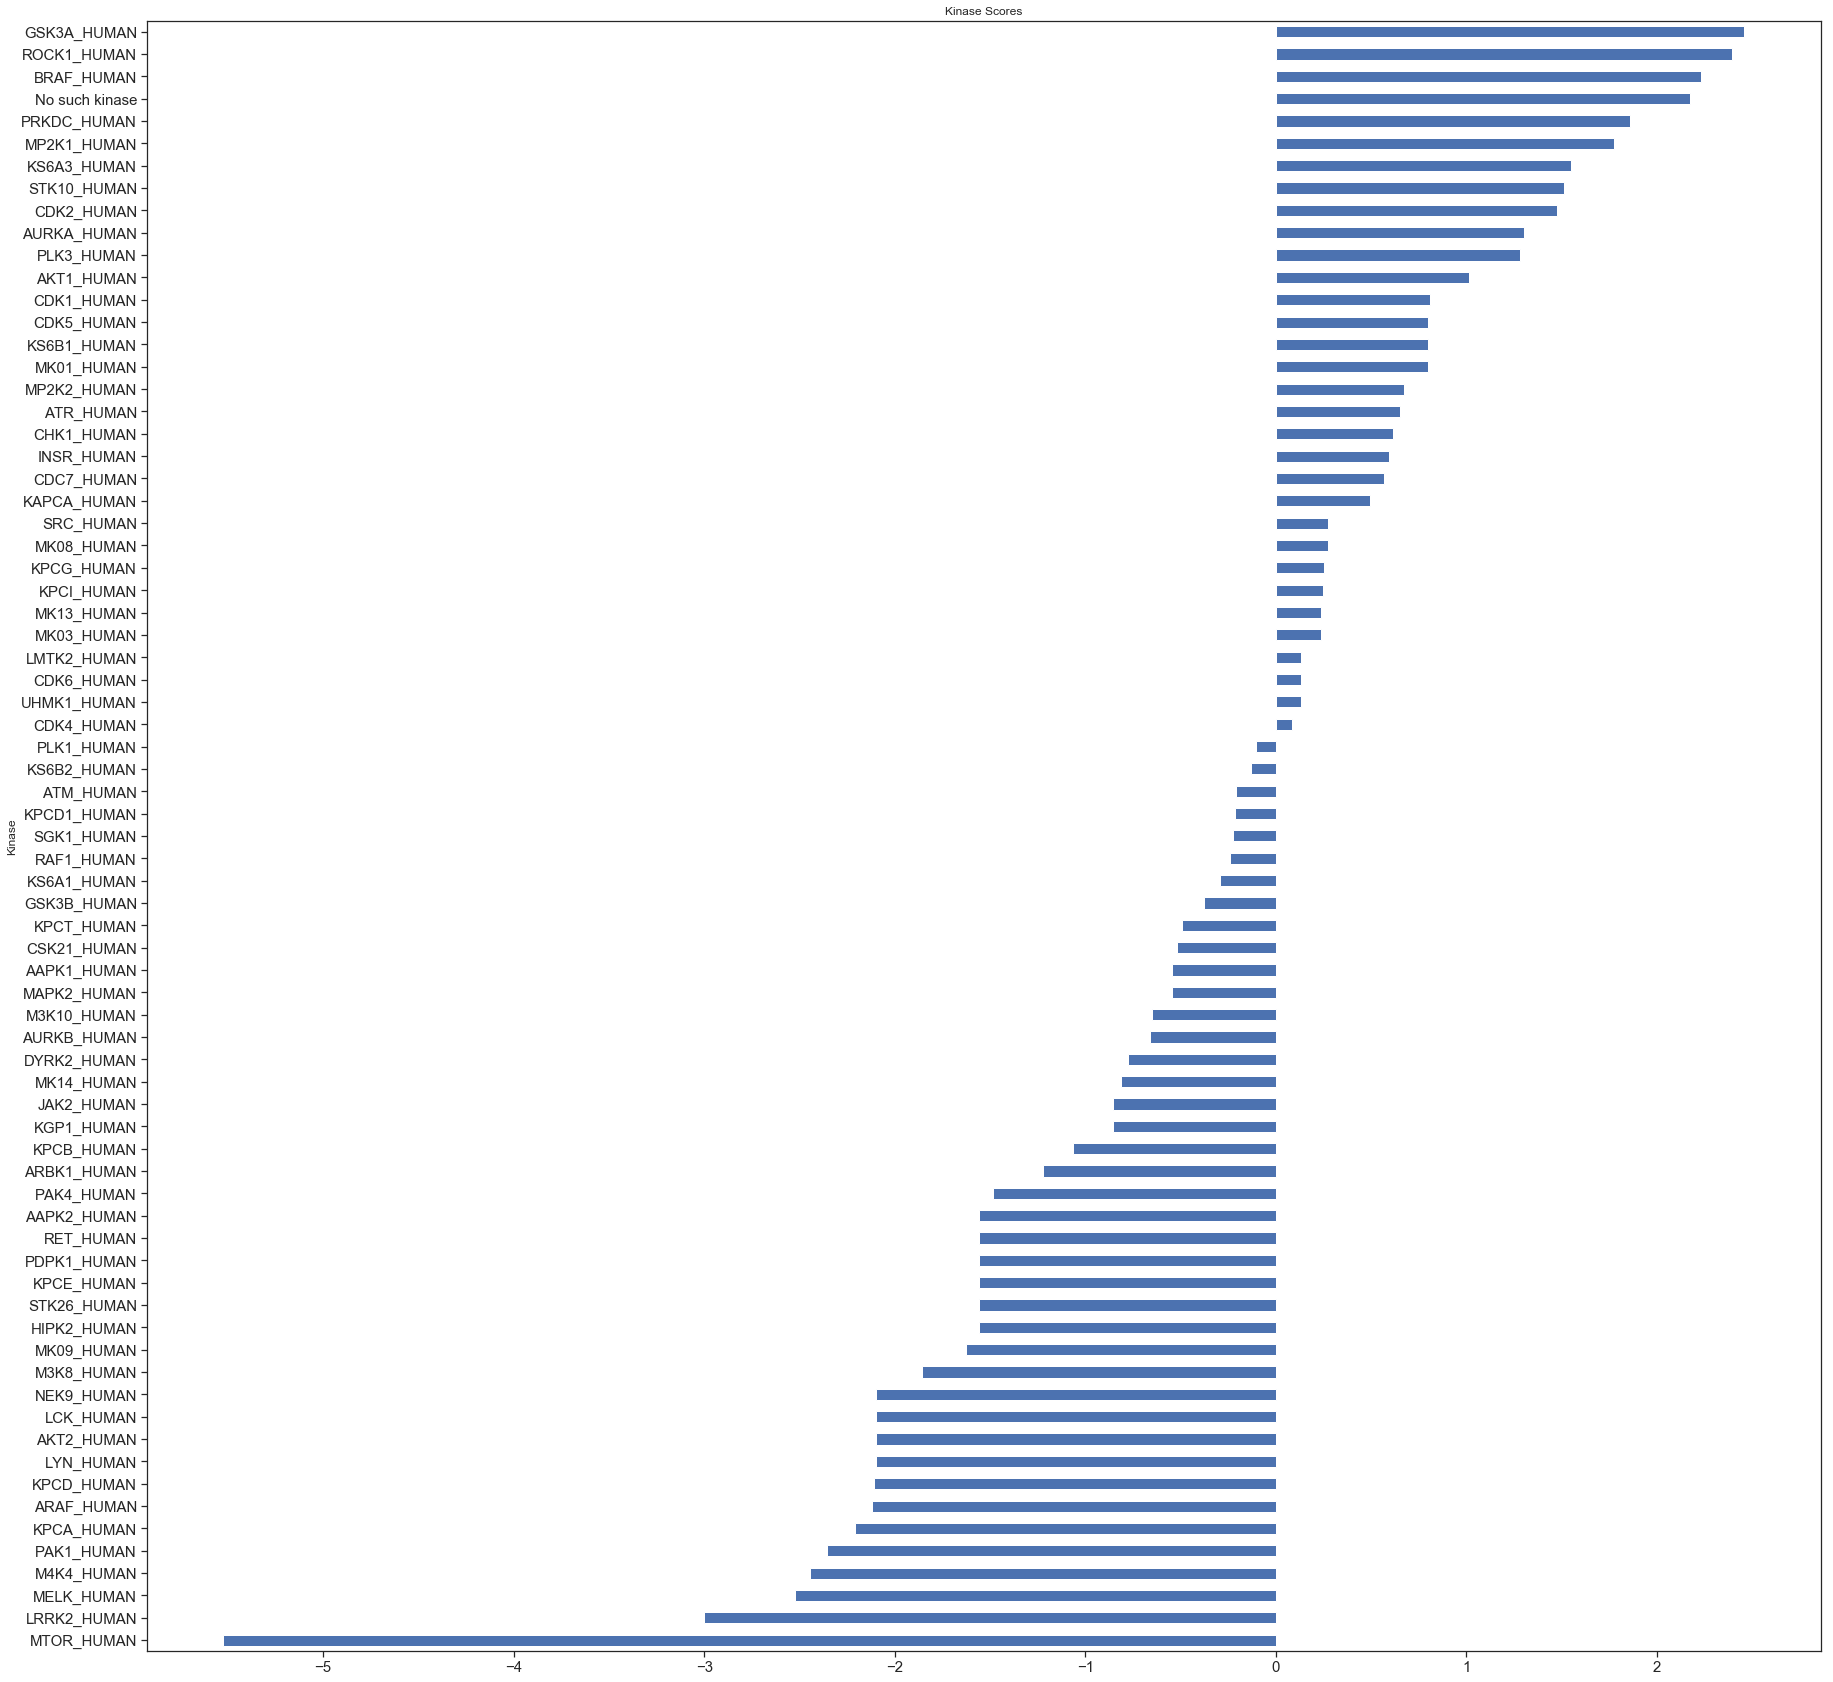

In [67]:
#assigned the kscore to a dataframe and made a table of the kinase and its kscore 
ksc=pd.DataFrame(data=kscore,columns=["Kscore"])
kinsc=list(kinasedict.keys())
ksms=pd.DataFrame(data=kinsc,columns=["Kinase"])
final=pd.concat([ksc,ksms],axis=1,join_axes=[ksms.index])
sortedf=final.sort_values(by="Kscore",axis=0)

sortedf.set_index('Kinase').plot.barh(title='Kinase Scores',legend=None)

plt.tick_params(labelsize = 15)
plt.rcParams['figure.figsize']=(15,15)
plt.show()
#colour down regyulated and up rergulated

In [88]:
top5=sortedf.nlargest(10, 'Kscore', keep='first')
print top5


bottom5=sortedf.nsmallest(10, 'Kscore', keep='first')

print bottom5

      Kscore          Kinase
48  2.459096     GSK3A_HUMAN
40  2.394330     ROCK1_HUMAN
30  2.233491      BRAF_HUMAN
56  2.170555  No such kinase
46  1.859749     PRKDC_HUMAN
27  1.775903     MP2K1_HUMAN
54  1.549111     KS6A3_HUMAN
19  1.514063     STK10_HUMAN
52  1.473566      CDK2_HUMAN
36  1.300168     AURKA_HUMAN
      Kscore       Kinase
53 -5.527545   MTOR_HUMAN
22 -3.001547  LRRK2_HUMAN
11 -2.522580   MELK_HUMAN
9  -2.443101   M4K4_HUMAN
24 -2.355631   PAK1_HUMAN
66 -2.208617   KPCA_HUMAN
14 -2.117170   ARAF_HUMAN
0  -2.108201   KPCD_HUMAN
61 -2.100360    LYN_HUMAN
37 -2.100360   AKT2_HUMAN
